

## Outline {.smaller}

:::{.columns}
:::{.column width="50%"}
### Part 1-2
1. **Foundations of LLMs**
   - Basic concepts and applications
   - Key components and capabilities

2. **Word Representation Evolution**
   - Classical approaches (One-hot, BoW, TF-IDF)
   - Neural approaches (Word2Vec)
:::

:::{.column width="50%"}
### Part 3-4
3. **Advanced Architectures**
   - RNN and its limitations
   - Attention mechanism
   - Transformer architecture

4. **Modern LLM Landscape**
   - BERT vs GPT architectures
   - Current trends and applications
:::
:::


## Use of LLMs {transition="convex"}

They are trained to tackle text-based tasks:

- Text classification.
- Text summarization (including sentiment analysis).
- Text generation (including translation and coding).
- Questions/Answers.
- Common sense reasoning.

:::{.fragment .callout-important}

LLMs (Large Language Models) are not necessarily GenAI, for instance, BERT is not a GenAI, but still an LLM.

:::

## Tasks that LLM can do

![Use of LLM](imgs/L1_2.png)

## Key Elements of LLMs {.smaller}

- **Tokenization & Embeddings**: Text → tokens → semantic vectors

- **Attention**: Weighs input relevance for context-aware predictions

- **Transformer**: Multi-layer architecture combining attention and neural networks

- **Training**: General pretraining on large corpora, then task-specific fine-tuning


## Word Embeddings

- One-hot encoding
- Bag of Words
- TF-IDF
- Word2Vec

## One-hot encoding{transition="fade-in zoom-out"}


- Each word is uniquely represented by a vector in a high-dimension space.
- Each dimension corresponds to one of the words in the vocabulary.


## Mathematical Intuition: Step by Step {.smaller}

### 1. Word Embeddings

:::{.columns}
:::{.column width="60%"}
From one-hot vector to embedding:
$$
\begin{align*}
\text{word}_{\text{one-hot}} &= [0,1,0,0,\dots,0] \\
\text{embedding} &= W \cdot \text{word}_{\text{one-hot}} \\
&= \text{corresponding row in }W
\end{align*}
$$
:::

:::{.column width="40%"}
:::{.callout-tip}
This is why we can directly look up the embedding instead of doing matrix multiplication!
:::
:::
:::

## Coding Example

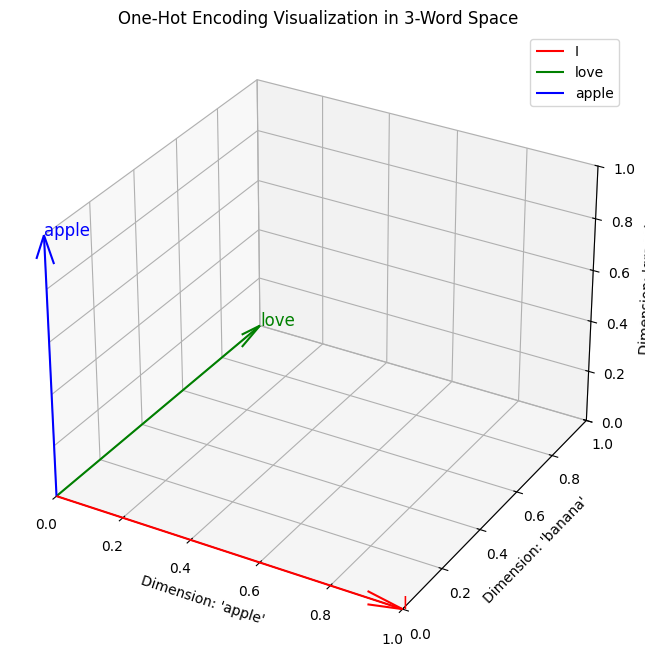

In [1]:
#| code-summary: One-hot Encoding Example
#| code-line-numbers: '7'
#| echo: true
# Plot the 3D space

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

vocab = ['I', 'love', 'apple']
# Define a simple vocabulary of three words
vocab_size = len(vocab)
# Create a mapping from words to indices
word_to_index = {word: idx for idx, word in enumerate(vocab)}

# Function to one-hot encode a word
def one_hot_encode(word, vocab_size):
    one_hot_vector = np.zeros(vocab_size)
    index = word_to_index[word]
    one_hot_vector[index] = 1
    return one_hot_vector

# Create one-hot encoded vectors for the simple vocabulary
one_hot_vectors = np.array([one_hot_encode(word, vocab_size) for word in vocab])

fig = plt.figure(figsize=(10, 8), facecolor='none',edgecolor='none')
ax = fig.add_subplot(111, projection='3d')

# Origin point
origin = [0, 0, 0]

# Define colors for each word
colors = ['red', 'green', 'blue']

# Add arrows and labels to the 3D plot with different colors
for i, word in enumerate(vocab):
    ax.quiver(*origin, *one_hot_vectors[i], length=1, arrow_length_ratio=0.1, color=colors[i], label=word)
    ax.text(one_hot_vectors[i, 0], one_hot_vectors[i, 1], one_hot_vectors[i, 2], word, color=colors[i], fontsize=12)

# Set the scale of the x, y, and z axes
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

ax.set_title("One-Hot Encoding Visualization in 3-Word Space")
ax.set_xlabel("Dimension: 'apple'")
ax.set_ylabel("Dimension: 'banana'")
ax.set_zlabel("Dimension: 'grape'")
ax.legend(loc='upper right')
plt.show()

## Any Drawbacks?
::: {.incremental}

- High dimensionality for large vocabularies

- Inability to represent word meanings or similarities.
:::


## Bag of Words
**Characteristics:**

- In BoW, a document is represented as a vector where each element corresponds to a word in the vocabulary
- The value represents the frequency or presence of that word in the document

## Example

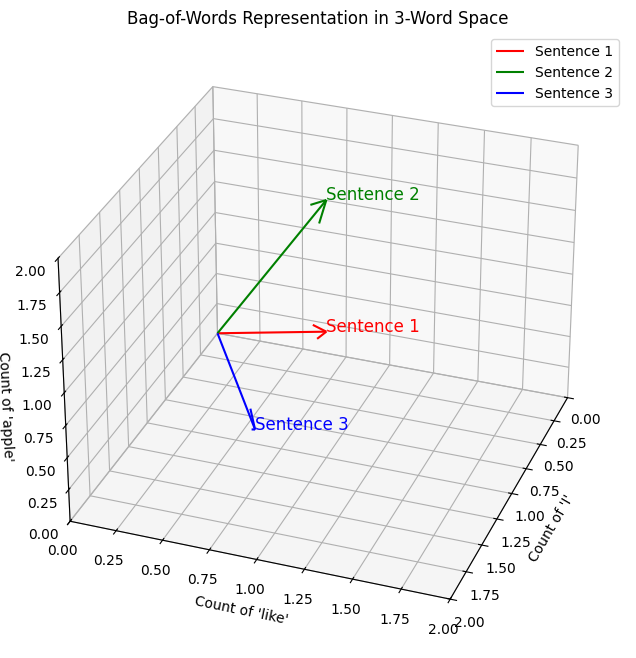

In [2]:
#| code-summary: Bag of Words Example
#| code-line-numbers: 8-12
#| echo: true

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter

# Define a vocabulary of three words
vocab = ['I', 'like', 'apple']
documents = [
    "I like apple",         # Sentence 1
    "apple, I like apple!", # Sentence 2
    "I, I like apple"     # Sentence 3
]
vocab_size = len(vocab)

# Create a mapping from words to indices
word_to_index = {word: idx for idx, word in enumerate(vocab)}

# Example meaningful sentences using only three words

# Function to build a BoW representation
def build_bow(documents, vocab):
    bow_matrix = np.zeros((len(documents), len(vocab)))
    for i, doc in enumerate(documents):
        word_counts = Counter([word.strip('.,!') for word in doc.split() if word in vocab])
        for word, count in word_counts.items():
            if word in word_to_index:
                bow_matrix[i, word_to_index[word]] = count
    return bow_matrix

# Build BoW representation
bow_matrix = build_bow(documents, vocab)
# Plot the BoW matrix in 3D using vectors with more 3D appearance
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0, 2])
ax.set_ylim([0, 2])
ax.set_zlim([0, 2])

# Define origin
origin = np.array([0, 0, 0])

# Define colors for each vector
colors = ['r', 'g', 'b']

# Add vector and labels to the 3D plot with different colors
# Define the correct vectors for each sentence
correct_vectors = np.array([[1, 1, 1], [1, 1, 2], [2, 1, 1]])
for i, doc in enumerate(documents):
    vec_from_origin = correct_vectors[i]
    # Draw vectors with arrowheads and make them appear more 3D
    ax.quiver(*origin, *vec_from_origin, arrow_length_ratio=0.1, color=colors[i], label=f'Sentence {i+1}')
    ax.text(*vec_from_origin, f'Sentence {i+1}', fontsize=12, color=colors[i])

# Add gridlines for better 3D effect
ax.view_init(azim=20)  # Rotate the plot by 90 degrees

ax.grid(True)

ax.set_title("Bag-of-Words Representation in 3-Word Space")
ax.set_xlabel("Count of 'I'")
ax.set_ylabel("Count of 'like'")
ax.set_zlabel("Count of 'apple'")
ax.legend(loc='upper right')
plt.show()

## BOW Discussion

#### Drawbacks

:::{.fragment}

- Treats all words equally regardless of their importance
- Some words are too common, e.g., is, are, we, he, she...

:::

:::{.fragment}

#### Solution

:::

:::{.fragment}

- Use stopwords to filter those words

:::

:::{.fragment}

:::{.callout-caution}
Howerver, this is not an algorithmic solution, as there are always words that cannot be included in stopwords list.
:::

:::

## TF-IDF {.smaller}

:::{.columns}
:::{.column}

- **Term Frequency:** In document d, the frequency represents the number of instances of a given word t.
- **Document Frequency:** The number of documents in which the word is present in document set N.
- **Inverse Document Frequency:** The more it appears, the less it becomes relevant.

:::
:::{.column}

![](imgs/L1_8.jpg)

:::
:::


## TF-IDF: an Illustration


::::{.columns}

:::{.column width="40%"}

- Document 1:
  - [I love apple]{style="color: green"}.
- Document 2:
  - [I love banana]{style="color: green"}.
- Document 3:
  - [You love grape]{style="color: green"}.

:::

:::{.column width="60%"}

| Term   | TF  | IDF | TF-IDF |
|--------|-----|-----|--------|
| I      | 1/3 | 3/2 | 1/2    |
| love   | 1/3 | 1   | 1/3    |
| apple  | 1/3 | 3   | 1      |
| banana | 0   | 3   | 0      |
| you    | 0   | 3   | 0      |
| grape  | 0   | 3   | 0      |

:::

::::

## TF-IDF Discussion

:::{.fragment}
**Drawbacks**

- Ignores word order and context,

- Suffers from data sparsity.

:::

:::{.fragment}

Could be [One]{style="color: green"} way out, that is...

:::

:::{.fragment}

#### Contextualised Learning

:::

:::{.fragment}

Let's introduce **Word2Vec**, the way to represent words in a continuous and condensed vector space.

::: {.aside}

Mikolov, Tomas, et al. "Distributed representations of words and phrases and their compositionality."*Advances in neural information processing systems* 26 (2013).

:::

:::

## How Word2Vec works


- Each word is initially one-hot encoded.
- Then using CBOW/Skip-gram to train the model.
- CBOW uses the context to predict the word;
- Skip-gram uses the word to predict the context.

![](imgs/L1_4.png)



## A Simple Example

:::{.columns}
:::{.column}

- Tong poured himself a cup of coffee.
- Window_size = 4

:::
:::{.column}

**Continuous Bag-of-Words**

- **Input:** [Tong, poured, a, cup]{style="color: green"}
- **Output:** himself

**Skip-Gram Model**

- **Input:** himself
- **Output:** [Tong, poured, a, cup]{style="color: green"}

:::
:::

## Word Embeddings {auto-animation=true}

:::{.columns}

:::{.column width="60%"}
![](imgs/L1_5.png)
:::

:::{.column width="40%"}
### Key Concepts
- Words with similar meanings cluster together
- Relationships between words are preserved
  - King - Man + Woman ≈ Queen
  - Paris - France + Italy ≈ Rome
:::
:::

## Understanding Word Vectors {.smaller}

Consider these word relationships:

In [3]:
#| echo: true
# Word vector examples
king  = [0.0, 0.7, 0.3, 0.9]
man   = [0.1, 0.5, 0.2, 0.3]
woman = [0.1, 0.4, 0.2, 0.8]
queen = [0.0, 0.6, 0.3, 1.4]

[The relationship is preserved!]{.fragment .highlight-blue}

:::{.callout-note}
### Vector Math
$\vec{king} - \vec{man} + \vec{woman} \approx \vec{queen}$

This shows how word vectors capture:

- Gender relationships
- Royal status
- Semantic meaning
:::


## Are there still drawbacks?

:::{.incremental}

- Static word representations
- Inability to handle polysemy (multiple meanings of a word)
- still lack of contextualization

:::

## Contextualised Embeddings {.smaller}

:::{.fragment}

We want:

- Learns word representations that are sensitive to the context in which the words appear;
- Embeddings should be a function of the entire input sentence, allowing for dynamic and context-dependent representations.

:::

:::{.fragment}

For example:

*I love apple products.* How to interpret the meaning of this sentence?

:::

:::{.fragment}

- I love apple products, they are delicious.
- I love apple products, they are easy to use.

:::

## That's why we need Transformers!



![](imgs/L1_6.png)



## That's why we need Transformers! {transition="zoom" visibility="uncounted"}



![](imgs/L1_3.png)


## The Origin of Transformer

- Recurrent Neural Networks

- Encoder-decoder infrastructure

- Self-Attention

- Attention is all your need

- What is the Future? Google vs OpenAI


## Recurrent Neural Network {.smaller}

- At each time step, the hidden state serves as the "memory" of the network and is updated and passed along, allowing the model to capture long-term dependencies in the sequence. This property makes RNNs particularly well-suited for processing sequential data such as text or speech.

![](imgs/L1_7.gif){fig-align="center"}


## RNN Gradient Flow: Visualised {.smaller}

Let's understand why gradients vanish in RNNs:

:::{.columns}
:::{.column width="60%"}
1. **Basic RNN Update**
   $$h_t = \tanh(W_h h_{t-1} + W_x x_t + b)$$

2. **Gradient Flow (Chain Rule)**
   $$\frac{\partial h_t}{\partial h_{t-k}} = \prod_{i=1}^k \frac{\partial h_{t-i+1}}{\partial h_{t-i}}$$

3. **Each Step's Gradient**
   $$\frac{\partial h_{t}}{\partial h_{t-1}} = \text{diag}(1-\tanh^2(z_t))W_h$$
:::

:::{.column width="40%"}
:::{.callout-warning}
### Problem Visualisation
![](imgs/gradient_flow.png)

As k increases, gradient either:

- [Vanishes]{style="color: blue"} (most common)
- [Explodes]{style="color: red"} (rare)

:::
:::
:::

## Understanding Gradient Terms {.smaller}

:::{.callout-note}
### Breaking Down the Gradient
1. $\text{diag}(1-\tanh^2(z_t))$:
   - This is the derivative of tanh
   - Always ≤ 1 in magnitude
   - Gets very small when $z_t$ is large

2. Multiplication by $W_h$:
   - Small eigenvalues cause vanishing
   - Large eigenvalues cause explosion
   - Example: with 100 steps
     - If each step × 0.9: $0.9^{100} \approx 0$
     - If each step × 1.1: $1.1^{100} \approx 13,781$
:::



## Consequences{.smaller}

During Backpropagation Through Time, the gradient of the loss with respect to a weight $W_h$ is affected by the gradient of the loss with respect to each hidden state $h_t$. The chain rule provides the mechanism for computing this relationship:

$$
\frac{\partial \mathcal{L}}{\partial W_h} = \sum_{t=1}^{T} \frac{\partial \mathcal{L}}{\partial h_t} \frac{\partial h_t}{\partial W_h}
$$

Here, $\frac{\partial h_t}{\partial W_h}$ can be expanded through the chain of derivatives relating subsequent hidden states:

$$
\frac{\partial h_t}{\partial W_h} = \frac{\partial h_t}{\partial h_{t-1}} \frac{\partial h_{t-1}}{\partial W_h} = \dots = \prod_{k=1}^{t} \frac{\partial h_k}{\partial h_{k-1}} \frac{\partial h_1}{\partial W_h}
$$

:::{.callout-warning .fragment}

The weights associated with early inputs hardly update!

:::

## Beyond RNNs {.smaller}

:::{.incremental}
- RNNs struggle with long sequences due to gradient problems
- We need a better way to:
  1. Process long sequences effectively
  2. Capture dependencies regardless of distance
  3. Allow parallel processing
:::

:::{.fragment}
This leads us to explore a different architecture...
:::

## Encoder-decoder Infrastructure {.smaller}

**Encoder:** receive input data and convert it into a fixed internal representation.

- Encoder is good at understanding the input and generating a meaningful, dense representation.
- Without the need to generate sequences, these models can be less complex and faster at inference for tasks.

**Decoder:** transform the context vector produced by the encoder into the target output.

- Decoder is good at sequence generation and directly mapping the input to output.
- Their performance heavily depends on the quality and relevance of the input prompt.
- Relatively weaker in understanding long-range textual input.

## Encoder-decoder Infrastructure: An Illustration

![](imgs/L1_9.png)

:::{.fragment}

**Drawbacks:**
The encoding step needs to represent the entire input sequence as a single vector, which can cause information loss due to compression.

:::

## We Need Long-range Memory


- Previous information be represented in various channels;
- Appropriate weight could be assigned to filter out proper information;
- Dynamic adjustment of these weights based on context;
- Capability to handle long dependencies;
- Efficient computation and memory usage;

## Long-range Memory {visibility="uncounted"}

![](imgs/L1_10.png){fig-align="center"}




## Attention Mechanism: An Intuitive View {.smaller}

Think of reading a complex novel:

:::{.incremental}
- When you read "The old man bought **it** at the store", your brain automatically:
  1. Looks back at previous context to understand what "it" refers to
  2. Focuses more on relevant words and less on others
  3. Combines multiple pieces of information to make sense
:::

:::{.fragment}
This is exactly how attention works in LLMs!
:::

## Attention Mechanism: Basic Structure {.smaller}

Think of attention as a smart way to focus on important information:

:::{.columns}
:::{.column width="60%"}
![](imgs/L1_12.png){fig-align="center"}
:::
:::{.column width="40%"}
### How It Works
1. For each word, we:
   - Look at all other words
   - Decide which ones are relevant
   - Combine their information

:::{.fragment}
Just like how you focus on key words when reading!
:::
:::
:::


## Attention in Practice {.smaller}

### Example 1: Language Translation
```text
English: "The bank by the river is steep"
French:  "La rive près de la rivière est escarpée"
```

:::{.fragment}
Here, "bank" could mean:
- A financial institution (banque)
- A riverbank (rive)

Attention helps the model focus on "river" to choose the correct translation!
:::

### Example 2: Question Answering
```text
Context: "Marie Curie won the Nobel Prize in Physics in 1903
         and in Chemistry in 1911"
Question: "When did Curie win the Chemistry prize?"
```

:::{.fragment}
The attention mechanism will:
1. Focus heavily on "1911" and "Chemistry"
2. Pay less attention to "1903" and "Physics"
3. Connect "Curie" with the relevant date
:::

## Attention Visualization {.smaller}

Let's see how attention works in sentiment analysis:

:::{.columns}
:::{.column width="50%"}
*"The movie was terrible, but the actor's performance was brilliant"*

![](imgs/L1_attention_example.png)
:::

:::{.column width="50%"}
### How Attention Works Here:
1. Each word pays attention to other relevant words
2. Sentiment words ("terrible", "brilliant") get high attention
3. Connections show which words influence each other
:::
:::

## How to calculate the Attention Score?
$$
 \text{Attention Scores} = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$

What are $Q$ $K$ and $V$? Why do they matter?

They are very important engineer-wise. Mathematically they are linear transformations.

:::{.callout-note}
### Softmax Function
For example, if we have scores [2.0, 1.0, 0.1] and we want to apply softmax, we get:
$$
\begin{align*}
\text{softmax}(2.0) &= \frac{e^{2.0}}{e^{2.0} + e^{1.0} + e^{0.1}} \approx 0.7 \\
\text{softmax}(1.0) &= \frac{e^{1.0}}{e^{2.0} + e^{1.0} + e^{0.1}} \approx 0.2 \\
\text{softmax}(0.1) &= \frac{e^{0.1}}{e^{2.0} + e^{1.0} + e^{0.1}} \approx 0.1
\end{align*}
$$
:::



## A Bit Linear Algebra {.smaller}

Image you have a word embeddings matrix $X$:
$$
\begin{align*}
\text{"I"} & : \begin{bmatrix} 1 & 2 & 1 & 2 & 1 \end{bmatrix} \\
\text{"love"} & : \begin{bmatrix} 1 & 1 & 3 & 2 & 1 \end{bmatrix} \\
\text{"apple"} & : \begin{bmatrix} 3 & 1 & 2 & 1 & 1 \end{bmatrix}
\end{align*}
$$

:::{.callout-note .fragment}

What do these numbers mean?

- Each word is represented by 5 numbers,
- These numbers capture different aspects of the word,
- Similar words should have similar patterns.

:::

## How Words Relate to Each Other {.smaller}

What are the implications of the self dot product $X X^T$?

$$
X X^T =
\begin{bmatrix}
11 & 11 & 10 \\
11 & 16 & 13 \\
10 & 13 & 16
\end{bmatrix}
$$

:::{.callout-important .fragment}

- Mathematically, the dot product is a projection of one vector on the other.
- Larger numbers = words are more relate.

:::


## Construct the Embeddings {.smaller}

That is, if two words are irrelevant, the dot product should be zero.

we standardize $XX^T$ by taking a softmax function for each row:

The softmax of each row in the matrix $X X^T$ is computed as follows:

$$
\text{Softmax}(X X^T) =
\begin{bmatrix}
0.422 & 0.422 & 0.155 \\
0.006 & 0.947 & 0.047 \\
0.002 & 0.047 & 0.950
\end{bmatrix}
=
\begin{bmatrix}
W_{I\ \ \ \ \ } \\
W_{love\ } \\
W_{apple}
\end{bmatrix}
$$


:::{.callout-important .fragment}

- Each row shows how much a word "pays attention" to other words,
- "love" and "apple" mostly focus on themselves (95%),
- "I" splits attention between itself and "love"

:::

## Construct the Embeddings {.smaller}

$$X^N = Softmax(XX^T)X$$

$$X^N_{I} = W_I *X = \begin{bmatrix} 1.4 & 1.4 & 2 & 1.8 & 1 \end{bmatrix}$$

In this new vector, each dimension's value is derived from a weighted sum of the values in that dimension across three word vectors.

:::{.columns}
:::{.column width="40%"}

:::{.callout-note}
For "I", the new meaning combines:

- 42% of "I"'s original meaning
- 42% of "love"'s meaning
- 16% of "apple"'s meaning

:::

:::

:::{.column width="60%"}

:::{.callout-note}

- This is how words learn from context!
- Words get influenced by related words
- Context helps disambiguate meaning
- Similar to how we understand words in sentences

:::
:::
:::



## Query, Key and Value {.smaller}

The attention mechanism has two main variants:

### 1. Self-Attention
When the sequence attends to itself (e.g., understanding a sentence):
$$
\begin{align*}
Q &= X W_Q \\
K &= X W_K \\
V &= X W_V
\end{align*}
$$
Where X is the input sequence.

### 2. Cross-Attention
When one sequence attends to another (e.g., translation from source to target):
$$
\begin{align*}
Q &= X_{target} W_Q & \text{(e.g., French sentence)} \\
K &= X_{source} W_K & \text{(e.g., English sentence)} \\
V &= X_{source} W_V & \text{(same as key sequence)}
\end{align*}
$$

## How to calculate the Attention Score? {.smaller}

In both cases, the attention scores are calculated the same way:
$$
 \text{Attention Scores} = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
$$

Simple calculation shows:

$$
QK^T = X (W_Q W_K^T)
X^T$$

It is still a projection, just with additional complexity.

### What is the $\sqrt{d_k}$ for?

- Assume that elements in $Q$ and $K$ are normalised to $N(0,1)$. Then the elements in $QK^T$ will have a mean of 0 and a variance of $d$. As $d$ becomes very large, the variance of the elements will also become very large.

- Therefore, by dividing each element in $\sqrt{d}$, the variance is brought back to 1.

- Finally, we manage to keep the gradient values stable during the training process.




## Cross-Attention Example {.smaller}

Let's see how cross-attention works in translation:

:::{.columns}
:::{.column width="40%"}

- English: ["I", "love", "ML"]
- French: ["Je"]

$$
\begin{align*}
Q = \begin{bmatrix}
q_{Je}
\end{bmatrix} \\
K = \begin{bmatrix}
k_I \\ k_{love} \\ k_{ML}
\end{bmatrix}
V = \begin{bmatrix}
v_I \\ v_{love} \\ v_{ML}
\end{bmatrix}
\end{align*}
$$
:::

:::{.column width="60%"}

### After Computation:
$$\text{softmax}(QK^T) = \begin{bmatrix}
0.8 & 0.15 & 0.05
\end{bmatrix}$$

:::{.callout-note}

When generating "Je":

- 80% attention to "I"
- 15% attention to "love"
- 5% attention to "ML"

:::
:::
:::

In encoder-decoder architectures like machine translation,Encoder uses self-attention to understand the source sentence, while decoder uses both self-attention (on what it's generated) and cross-attention (to look at source).



## Summaries {.smaller}

Let's break it down step by step:

:::{.columns}
:::{.column width="60%"}
### Step 1: Calculate Attention Scores
$$[\color{#2780e3}{QK^T}] = \begin{bmatrix}
q_1 \cdot k_1 & q_1 \cdot k_2 \\
q_2 \cdot k_1 & q_2 \cdot k_2
\end{bmatrix}$$

### Step 2: Scale the Scores
$$[\color{#3fb618}{\frac{QK^T}{\sqrt{d_k}}}]$$
:::

:::{.column width="40%"}
### Why Scale?
- Prevents extremely large values
- Keeps gradients stable
- Makes training smoother

:::{.callout-tip}
Like normalizing your test scores to be between 0 and 1
:::
:::
:::

## Computing Attention {.smaller}

Let's see a concrete example:

:::{.columns}
:::{.column width="50%"}
Input: ["I", "love", "ML"]

$$
\begin{align*}
Q &= \begin{bmatrix}
q_1 \\ q_2 \\ q_3
\end{bmatrix} \\
K &= \begin{bmatrix}
k_1 \\ k_2 \\ k_3
\end{bmatrix} \\
V &= \begin{bmatrix}
v_1 \\ v_2 \\ v_3
\end{bmatrix}
\end{align*}
$$
:::

:::{.column width="50%"}
### After Computation:
$$\text{softmax}(QK^T) = \begin{bmatrix}
0.7 & 0.2 & 0.1 \\
0.1 & 0.8 & 0.1 \\
0.1 & 0.2 & 0.7
\end{bmatrix}$$

:::{.callout-note}
Each row shows how much attention each word pays to others:

- "I" pays 70% attention to itself
- "love" pays 80% attention to itself
- "ML" pays 70% attention to itself
:::
:::
:::

## Why Attention Works {.smaller}

:::{.columns}
:::{.column width="50%"}
### Key Benefits
1. Direct connections between words
2. No information bottleneck
3. Parallel computation
4. Better gradient flow
:::

:::{.column width="50%"}
### Compared to RNNs

- No vanishing gradients
- Can handle long sequences
- Faster training
:::
:::

:::{.fragment .callout-tip}
Think of attention as a [smart search system]{style="color: #2780e3"} that knows what's [important]{style="color: #3fb618"} and returns [relevant information]{style="color: #e83e8c"}
:::

## Self-Attention

Attenion mechanism maps input information to output, this is called **cross-attention.** However, when we read books, it is nature for us to pay attention to previous keywords and use them to help understanding the subsequent context.

- In a traditional attention mechanism, it is normal that $Q$,$K$ and $V$ are from different sources, $Q$ might from the translated language, $K$ might from the original language.
- In a self-attention mechanism, $Q$,$K$ and $V$ are trained from the same sources.



## Example

Let's look at an example:

*The animal didn't cross the street because it was too tired.*

![](imgs/L1_15.png){fig-align="center"}

:::{.callout-tip .fragment}

This implies that 'it' should refers to the word 'animal'.

:::

## Example

if we add two attention heads, i.e., two independent attention mechanism/matrices to screen this sentence:

![](imgs/L1_16.png){fig-align="center"}


:::{.callout-tip .fragment}

'it' related to 'animal' and 'tired'. **because of the word 'tired', 'it' refers to 'animal'.

:::

## Your Turn

How about another sentence: *The animal didn't cross the street because it was too wide.*

Have a try here: [Attn Viz Tool](https://colab.research.google.com/github/tensorflow/tensor2tensor/blob/master/tensor2tensor/notebooks/hello_t2t.ipynb#scrollTo=OJKU36QAfqOC)


## One More Question

As attention layer signficantly improves the performance. It raises a question:

:::{.fragment style="color: red; text-align: center"}

**Why we need RNN/CNN/LSTM/...?**

:::


## Naturally... {.center visibility="uncounted"}



## Attention is all your need

:::{.fragment}

![](imgs/L1_11.png){fig-align="center"}

:::

## Google Vs OpenAI{transition="zoom"}

![](imgs/L1_13.png){fig-align="center"}


## The Birth of GPT {.smaller}

- The GPT-1 architecture was a twelve-layer decoder-only transformer, using twelve masked self-attention heads, with 64-dimensional states each (for a total of 768).
- https://github.com/openai/finetune-transformer-lm
- Radford, Alec, et al. "Improving language understanding by generative pre-training." (2018)


![](imgs/L1_14.png){fig-align="center"}



## BERT VS GPT {.smaller}

|       | GPT | BERT |
|-|-----|------|
| Pros  | - Excels in generating coherent text.<br>- Autoregressive nature suitable for dialogue systems.<br>- Simpler training process compared to bidirectional models. | - Bidirectional context enhances understanding.<br>- Versatile across various NLP tasks.<br>- Adaptable for specific challenges with minimal additional training. |
| Cons  | - Limited contextual understanding compared to BERT.<br>- Less flexible for tasks requiring deep understanding of context. | - Computationally expensive, requiring substantial resources.<br>- Can overfit on smaller datasets. |


## BERT vs GPT: Real-world Applications {.smaller}

:::{.columns}
:::{.column width="50%"}
### BERT Applications
- **Document Classification**
  - Email spam detection
  - News categorization
  - Content moderation

- **Information Extraction**
  - Resume parsing
  - Medical record analysis
  - Legal document review

- **Question Answering**
  - Customer service bots
  - Educational platforms
  - Technical documentation search
:::

:::{.column width="50%"}
### GPT Applications
- **Content Generation**
  - Marketing copy
  - Product descriptions
  - Creative writing

- **Conversation**
  - Customer support chatbots
  - Language learning assistants
  - Virtual companions

- **Code Generation**
  - Code completion
  - Documentation writing
  - Bug fixing suggestions
:::
:::

## BERT vs GPT: Practical Examples {.smaller}

### BERT Example: Sentiment Analysis
```text
Input: "The food was cold but the service was great"
BERT: Analyzes the entire sentence at once to understand:
- "cold" (negative) applies to "food"
- "great" (positive) applies to "service"
Result: Mixed sentiment, context-aware understanding
```

### GPT Example: Writing Assistant
```text
Prompt: "Write a product description for a new coffee maker"
GPT: Generates coherent, contextual text:
"Introducing our latest coffee maker, featuring precision temperature
control and a built-in grinder. Start your mornings with..."
```

:::{.fragment .callout-tip}
Choose BERT when you need deep understanding, GPT when you need generation!
:::

## Real-world Applications {.smaller}

### 1. Word Embeddings in Practice

:::{.columns}
:::{.column width="50%"}
#### Search Engine Enhancement
```python
# Example: Semantic search
query = "affordable laptop"
similar_terms = model.similar_words(query)
# Results: "budget computer", "cheap notebook",
#          "inexpensive PC"
```

:::

:::{.column width="50%"}
#### Product Recommendations
```python
# Example: Product matching
user_query = "running shoes"
related = ["athletic footwear", "sports shoes",
           "training sneakers"]
# Uses word similarity to match products
```
:::
:::

### 2. Attention Mechanism Applications

:::{.columns}
:::{.column width="50%"}

#### Document Summarization
```text
Long text → Attention identifies key sentences
→ Generates concise summary focusing on
important points
```
:::

:::{.column width="50%"}

#### Medical Diagnosis
```text
Patient symptoms → Attention weighs different
symptoms → Suggests possible conditions
based on learned patterns
```
:::
:::

### 3. Transformer Architecture in Action

:::{.columns}
:::{.column width="50%"}
#### Code Completion
```python
def calculate_average(numbers):
    total = sum(numbers)
    return total/  # Transformer suggests:
                  # len(numbers)
```

#### Legal Document Analysis
```text
Contract review → Identifies key clauses
→ Flags potential issues → Suggests
modifications
```
:::

:::{.column width="50%"}
#### Content Moderation
```text
Social media post → Multi-head attention
analyzes different aspects:
- Hate speech
- Inappropriate content
- Spam patterns
```

#### Scientific Research
```text
Research papers → Analyzes methodology
→ Identifies similar studies
→ Suggests potential collaborations
```
:::
:::

### 4. RNN Applications (Historical Context)

:::{.columns}
:::{.column width="50%"}
#### Time Series Prediction
```python
# Stock price prediction
historical_data = [100, 102, 98, 103]
predicted_next = rnn.predict(historical_data)
# Shows limitations with long sequences
```
:::

:::{.column width="50%"}
#### Speech Recognition
```text
Audio signal → RNN processes sequentially
Challenge: Long audio sequences lead to
gradient issues
```
:::
:::

## Modern LLM Applications

:::{.columns}
:::{.column width="50%"}
#### ChatGPT-style Applications
```text
User: "Explain quantum computing"
LLM: Processes request using:
1. Attention to focus on key concepts
2. Contextual understanding
3. Knowledge integration
```

#### Code Generation
```python
# Comment to code conversion
# "Calculate factorial recursively"
def factorial(n):
    if n <= 1: return 1
    return n * factorial(n-1)
```
:::

:::{.column width="50%"}
#### Educational Tools
```text
Student: "I don't understand derivatives"
LLM: Provides:
- Step-by-step explanations
- Relevant examples
- Practice problems
```

#### Business Applications
```text
- Email drafting
- Report summarization
- Data analysis
- Customer service automation
```
:::
:::

:::{.callout-tip}
### Key Takeaway
Each advancement in NLP architecture has enabled new applications, with modern LLMs combining the strengths of all previous approaches.
:::

## Take Aways

- Large Language Models (LLMs) use tokenization, word embeddings, attention, and transformer architecture for various text tasks.

- Word embeddings represent words in vector space, but contextualized embeddings are needed for better understanding.

- Transformers revolutionized NLP with self-attention, enabling efficient long-range processing. BERT (bidirectional) excels at understanding, while GPT (autoregressive) is better at generating text.

## References {.smaller .scrollable}

- Mikolov, Tomas, et al. "Efficient Estimation of Word Representations in Vector Space." *Proceedings of the International Conference on Learning Representations.* 2013.
- Mikolov, Tomas, et al. "Distributed Representations of Words and Phrases and their Compositionality." *Advances in Neural Information Processing Systems.* 2013.
- Bahdanau, Dzmitry, Kyunghyun Cho, and Yoshua Bengio. "Neural Machine Translation by Jointly Learning to Align and Translate." *3rd International Conference on Learning Representations, ICLR 2015 - Conference Track Proceedings*. 2015.
- Vaswani, Ashish, et al. "Attention is All You Need." *Advances in Neural Information Processing Systems 30 (NIPS 2017)*. 2017.